In [35]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Make an x,y plot of the galaxy distribution. (make sure the axes on your plot have a square aspect ratio) See – it’s a cluster!

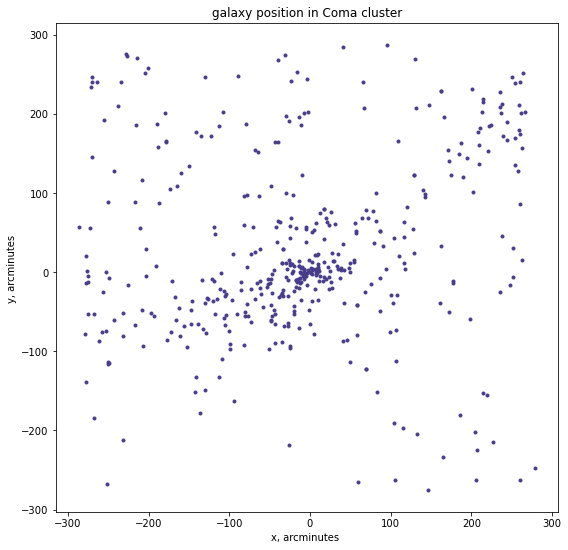

In [36]:
plt.figure(figsize = (9,9))

data = np.loadtxt('coma.txt')

plt.plot(data[:,1], data[:,2], '.', c = 'darkslateblue')
plt.title('galaxy position in Coma cluster')
plt.xlabel('x, arcminutes ')
plt.ylabel('y, arcminutes ')
plt.show()

In [37]:
import plotly.express as px


fig = px.scatter(x = data[:,1], y = data[:,2])
fig.update_yaxes(range=[-300, 300])
fig.update_xaxes(range=[-300, 300])
fig.update_layout(autosize=False, width=500, height=500)

Make a histogram of the radial velocity of all the galaxies (use bins with width of 250 km/s, and don’t include galaxies without velocity measurements when making your histogram!). How would this help you decide which galaxies actually were part of the Coma cluster?

In [38]:
plt.figure()


vel = []
for v in data[:, 3]:
    if v!=0:
        vel.append(v)

        
m = max(vel)
n = int(m / 100)
binBoundaries = np.linspace(0, m, n)
fig = px.histogram(vel, nbins=n)
fig.update_layout(autosize=False, width=1000, height=500)
fig.show()

<Figure size 432x288 with 0 Axes>

Looking only at galaxies with 4000 < cz < 10000 km/s (why?), calculate the mean velocity and velocity dispersion of the galaxy sample.

In [39]:
cz = []
for c in data[:, 3]:
    if c>4000 and c<10000:
        cz.append(c)
                
vel = []
for v in cz:
    vv = v
    vel.append(vv)
    
v_mean = np.mean(vel)
    
disp_ar = []
for v in vel:
    vv = v - v_mean
    disp_ar.append(vv)
    
disp_mean = np.mean(v)  

print('mean velocity:', v_mean,  'dispersion example', vel[167]-v_mean)

mean velocity: 6925.482014388489 dispersion example -707.482014388489


[  12.68109184 7037.98685912  831.9755409 ]


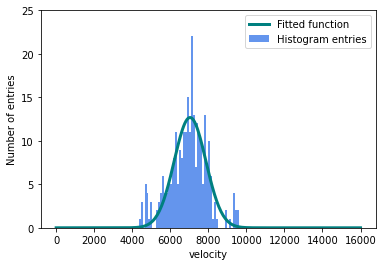

mean velocity: 7037.986859120244 
 dispersion 831.9755408963002


<Figure size 432x288 with 0 Axes>

In [40]:
from scipy.optimize import curve_fit

def fit_function(x, B, mu, sigma):
    return ( B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))



cz = []
for c in data[:, 3]:
    if c>4000 and c<10000:
        cz.append(c)
datt = cz
bins = binBoundaries
data_entries, bins = np.histogram(datt, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20, 6000, 700])
print(popt)

xspace = np.linspace(0, 16000, len(datt))

plt.bar(binscenters, data_entries, width = bins[1] - bins[0], color='cornflowerblue', label='Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='teal', linewidth=3, label=r'Fitted function')

plt.ylim(0,25)
plt.xlabel(r'velocity')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

print('mean velocity:', popt[1], '\n', 'dispersion', popt[2])

From your data, how far away is Coma?

v = H_o*d, so:

In [41]:
d = v_mean / 72 
print(d, 'Mpc')
dist = d * 3.2616
print(dist, 'million light years')

96.18725019984012 Mpc
313.72433525179855 million light years


Calculate the total blue luminosity (in solar luminosities) for the Coma cluster. Ignore galaxies with cz < 4000 and cz >10000, but include galaxies with unmeasured redshifts. For reference, the absolute blue magnitude of the Sun is MB = +5.48.

In [42]:
lum = []
for i in range(len(data[:, 3])):
    if data[i, 3] > 4000 and data[i, 3] <10000 or data[i, 3] == 0:
        lumi = int(data[i, 4])
        lumi = lumi - 5 * np.log10(d * 10**6) + 5
        lum.append(lumi)
        

        
sumi = []
for l in lum:
    lumm = 2.512 ** (5.48 - l)
    sumi.append(lumm)
    
total_lum = sum(sumi)


print(round(total_lum/10**6), 'million solar luminosities, roughly', round(total_lum / 10**13, 1), '* 10^13 solar luminosities')

#now total magnitude first:
magn = []
for i in range(len(data[:, 3])):
    if data[i, 3] > 4000 and data[i, 3] <10000 or data[i, 3] == 0:
        mag = int(data[i, 4])
        magn.append(mag)
        
        
sumten = []
for m in magn:
    sumten.append(10**(-0.4 * m))
    
m_sum = -2.5 * np.log10(sum(sumten))

M_sum = m_sum + 5 - 5*np.log10(d * 10**6)
L_coma = 2.512 ** (5.48 - M_sum)

print(round(L_coma/10**6), 'million solar luminosities, roughly', round(total_lum / 10**13, 1), '* 10^13 solar luminosities')
##same, cool!

15844672 million solar luminosities, roughly 1.6 * 10^13 solar luminosities
15848352 million solar luminosities, roughly 1.6 * 10^13 solar luminosities


Figure out the radius (in arcminutes) which contains roughly half the total blue luminosity (it doesn’t have to be an exact solution, but you should get it to +/- 20 arcminutes or so). This is called the half-light radius, which is our estimate of the size of the Coma cluster.

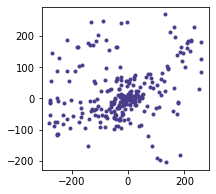

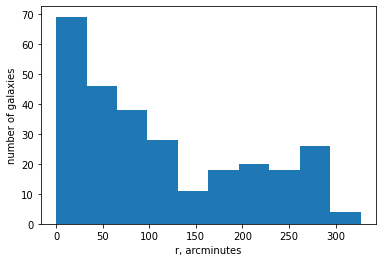

<IPython.core.display.Javascript object>


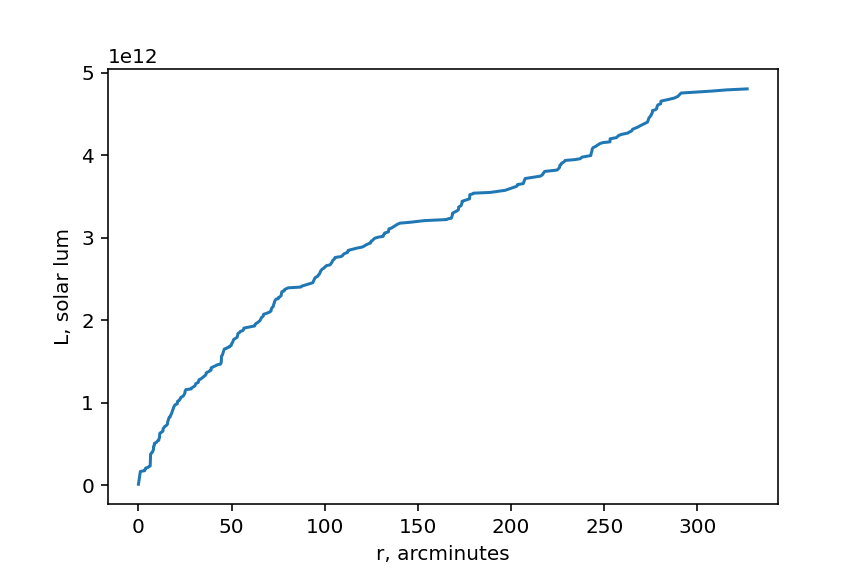

<IPython.core.display.Javascript object>


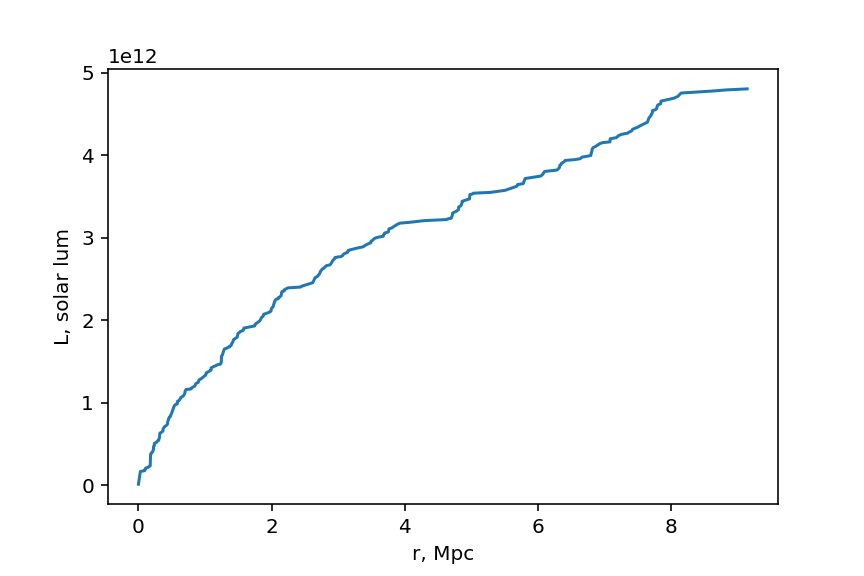

Text(0, 0.5, 'L, solar lum')

In [43]:
%matplotlib inline
xs = []
ys = []
lums = []
for i in range(len(data[:, 3])):
    if data[i, 3] > 4000 and data[i, 3] < 10000: #or data[i, 3] == 0:
        xs.append(data[i,1])
        ys.append(data[i,2])
        lums.append(data[i,4]) 

plt.figure(figsize = (3,3))
plt.plot(xs, ys, '.', c = 'darkslateblue')
plt.show()

##let's build the ghaph showing dependendence Luminosity - Radii:

rho = []
phi = []
for i in range(len(xs)):
    rhoi = np.sqrt(xs[i]**2 + ys[i]**2)
    phii = np.arctan2(ys[i], xs[i])
    rho.append(rhoi)
    phi.append(phii)


#creating tuples (r and m)
okay = list(zip(rho,lums))
for i in range(len(rho)):
    okay[i] = list(okay[i])

good = sorted(okay) #sorted by r

    
    
lum_inside = []
ars = []


for r in range(len(rho)):
    t = good[r]
    ars.append(t[0]) #array of r
    m_abs = t[1] + 5 - 5*np.log10(d*(10**6))
    tempo = 10**(0.4 * (5.48 - m_abs))#L на окружности
    if r!=0:
        tempo += lum_inside[r-1] #L на окружности и внутри
    lum_inside.append(tempo)

plt.figure()
plt.hist(ars)
plt.xlabel(r'r, arcminutes')
plt.ylabel(r'number of galaxies')
plt.show()

%matplotlib notebook
plt.figure()
plt.plot(ars, lum_inside)
plt.xlabel(r'r, arcminutes')
plt.ylabel(r'L, solar lum')



pc = []
for r in ars:
    pcs = d * (r / (60*180) * np.pi)
    pc.append(pcs)
    
    
plt.figure()
plt.plot(pc, lum_inside)
plt.xlabel(r'r, Mpc')
plt.ylabel(r'L, solar lum')

Now calculate the virial mass of Coma (in solar masses).

In [44]:
R_sup = 2*10**6#d * 10**6 * np.sin(100)
#print(R_sup)
G = 4.3 * 10**(-3)
M = 3 * R_sup * (popt[2])**2 / G
print(M, 'roughly', round(M/10**15), '*10^15')

965837163697243.9 roughly 1 *10^15


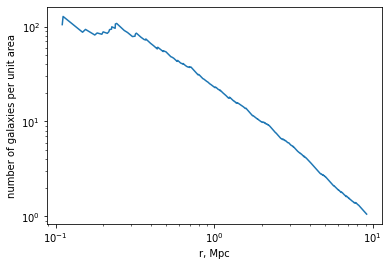

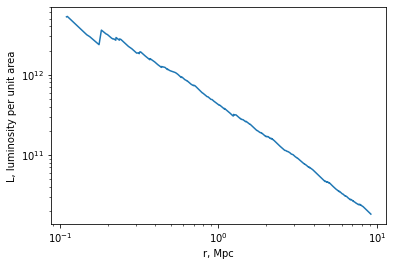

In [101]:
galunit = []
lumunit = []
newpc = []
for i in range(len(pc)):
    if pc[i] >= 0.1:
        newpc.append(pc[i])
        galunit.append(i / (np.pi * pc[i]**2 ))
        lumunit.append(lum_inside[i] / (np.pi * pc[i]**2 ))
  



%matplotlib inline
plt. figure()
plt.plot(newpc, galunit)
plt.xlabel(r'r, Mpc')
plt.ylabel(r'number of galaxies per unit area')
plt.yscale('log')
plt.xscale('log')
plt.show()


plt. figure()
plt.plot(newpc, lumunit)
plt.xlabel(r'r, Mpc')
plt.ylabel(r'L, luminosity per unit area')
plt.yscale('log')
plt.xscale('log')
plt.show()

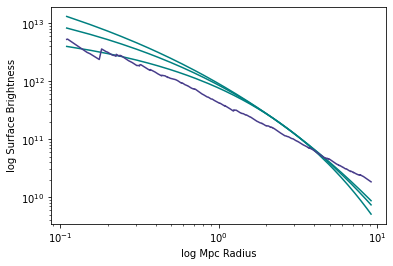

In [102]:
from astropy.modeling.models import Sersic1D


plt.figure()
plt.xscale('log')
plt.yscale('log')
sersic = Sersic1D(amplitude= 2.3 * 10**11, r_eff = 2.2 )
r = newpc

for n in range(2, 5):
     sersic.n = n
     plt.plot(r, sersic(r), color='teal' )

    
plt.xlabel(r'log Mpc Radius')
plt.ylabel(r'log Surface Brightness')
plt.plot(newpc, lumunit, color = 'darkslateblue')
plt.show()